# Lesson 2

In [1]:
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np

# 1

Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [2]:
data, target, coef = datasets.make_regression(n_samples=1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 42)

In [3]:
def mserror(X, w, y_pred):
    
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [4]:
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)

In [5]:
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

In [6]:
gd_error = []
gds_error = []
gds_error_l2 = []

In [7]:
# градиентный спуск 

X = np.copy(data)
y = np.copy(target)

w = np.zeros(2)
alpha = 0.01
max_iter = 10000
min_weight_dist = 1e-8
weight_dist = np.inf
iter_num = 0

while iter_num < max_iter:
    new_w = w - 2 * alpha * np.dot(X.T, (np.dot(X, w) - y)) / y.shape[0]
    weight_dist = np.linalg.norm(new_w - w, ord=2)
        
    iter_num += 1
    w = new_w
    
    gd_error.append(mserror(X, new_w, y))
    
    if iter_num%500==0:
        print(f'Iteration: {iter_num}, mse = {mserror(X, new_w, y)}')  

Iteration: 500, mse = 27.264194283234012
Iteration: 1000, mse = 27.26419164789096
Iteration: 1500, mse = 27.264191647890996
Iteration: 2000, mse = 27.26419164789099
Iteration: 2500, mse = 27.26419164789099
Iteration: 3000, mse = 27.26419164789099
Iteration: 3500, mse = 27.26419164789099
Iteration: 4000, mse = 27.26419164789099
Iteration: 4500, mse = 27.26419164789099
Iteration: 5000, mse = 27.26419164789099
Iteration: 5500, mse = 27.26419164789099
Iteration: 6000, mse = 27.26419164789099
Iteration: 6500, mse = 27.26419164789099
Iteration: 7000, mse = 27.26419164789099
Iteration: 7500, mse = 27.26419164789099
Iteration: 8000, mse = 27.26419164789099
Iteration: 8500, mse = 27.26419164789099
Iteration: 9000, mse = 27.26419164789099
Iteration: 9500, mse = 27.26419164789099
Iteration: 10000, mse = 27.26419164789099


In [8]:
# стохастический градиентного спуска

X = np.copy(data)
y = np.copy(target)

w = np.zeros(2)
alpha = 0.1
max_iter = 10000
weight_dist = np.inf
iter_num = 0
np.random.seed(42)

while iter_num < max_iter:
    
    train_ind = np.random.randint(X.shape[0])
    new_w = w - 2 * alpha * np.dot(X[train_ind].T, (np.dot(X[train_ind], w) - y[train_ind])) / y.shape[0]

    weight_dist = np.linalg.norm(new_w - w, ord=2)
    gds_error.append(mserror(X, new_w, y))
    
    iter_num += 1
    w = new_w
    
    if iter_num%500==0:
        print(f'Iteration: {iter_num}, mse = {mserror(X, new_w, y)}') 

Iteration: 500, mse = 1314.9949928029557
Iteration: 1000, mse = 1085.1520906605633
Iteration: 1500, mse = 890.401268108155
Iteration: 2000, mse = 725.5758085209078
Iteration: 2500, mse = 595.1847375334039
Iteration: 3000, mse = 495.76622659845276
Iteration: 3500, mse = 408.3181196269246
Iteration: 4000, mse = 333.13104244336074
Iteration: 4500, mse = 277.19965346028556
Iteration: 5000, mse = 232.56609877934105
Iteration: 5500, mse = 195.43079905325212
Iteration: 6000, mse = 164.9815729924472
Iteration: 6500, mse = 140.4971285335495
Iteration: 7000, mse = 118.60217403316048
Iteration: 7500, mse = 103.32885465622464
Iteration: 8000, mse = 90.72053915843182
Iteration: 8500, mse = 77.48008906163649
Iteration: 9000, mse = 67.65017199867663
Iteration: 9500, mse = 60.37235301723245
Iteration: 10000, mse = 54.33107628294757


Text(0, 0.5, 'MSE')

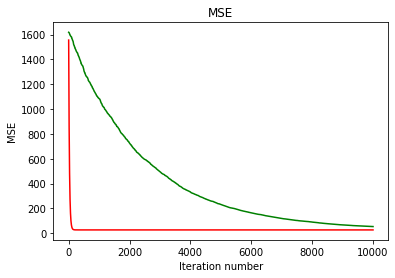

In [9]:
plt.plot(range(len(gd_error)), gd_error, color='r')
plt.plot(range(len(gds_error)), gds_error, color='g')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

# 2

Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [10]:
def mserror_l2(X, w, y_pred):
    
    y = X.dot(w) 
    return (sum((y - y_pred)**2)) / len(y) + sum(w)**2

In [11]:
# стохастический градиентного спуска

X = np.copy(data)
y = np.copy(target)

w = np.zeros(2)
alpha = 0.1
max_iter = 10000
weight_dist = np.inf
iter_num = 0
np.random.seed(42)

while iter_num < max_iter:
    
    train_ind = np.random.randint(X.shape[0])
    new_w = w - 2 * alpha * np.dot(X[train_ind].T, (np.dot(X[train_ind], w) - y[train_ind])) / y.shape[0]

    weight_dist = np.linalg.norm(new_w - w, ord=2)
    gds_error_l2.append(mserror_l2(X, new_w, y))
    
    iter_num += 1
    w = new_w
    
    if iter_num%500==0:
        print(f'Iteration: {iter_num}, mse = {mserror(X, new_w, y)}') 

Iteration: 500, mse = 1314.9949928029557
Iteration: 1000, mse = 1085.1520906605633
Iteration: 1500, mse = 890.401268108155
Iteration: 2000, mse = 725.5758085209078
Iteration: 2500, mse = 595.1847375334039
Iteration: 3000, mse = 495.76622659845276
Iteration: 3500, mse = 408.3181196269246
Iteration: 4000, mse = 333.13104244336074
Iteration: 4500, mse = 277.19965346028556
Iteration: 5000, mse = 232.56609877934105
Iteration: 5500, mse = 195.43079905325212
Iteration: 6000, mse = 164.9815729924472
Iteration: 6500, mse = 140.4971285335495
Iteration: 7000, mse = 118.60217403316048
Iteration: 7500, mse = 103.32885465622464
Iteration: 8000, mse = 90.72053915843182
Iteration: 8500, mse = 77.48008906163649
Iteration: 9000, mse = 67.65017199867663
Iteration: 9500, mse = 60.37235301723245
Iteration: 10000, mse = 54.33107628294757


Text(0, 0.5, 'MSE')

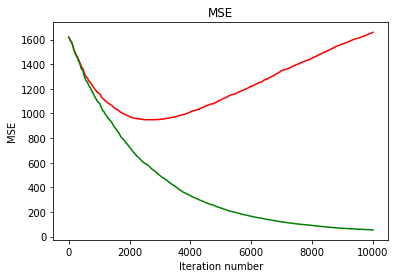

In [12]:
plt.plot(range(len(gds_error_l2)), gds_error_l2, color='r')
plt.plot(range(len(gds_error)), gds_error, color='g')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')